## Acerca de conjunto de datos

Este dataset contiene información de pacientes con y sin diagnóstico de Alzheimer. Incluye variables demográficas, médicas, de estilo de vida y antecedentes familiares que pueden influir en la aparición de la enfermedad. fue extraido de kagle

1. Age: Edad del paciente.  
2. Gender: Sexo del paciente (Male / Female).  
3. Education Level: Nivel de educación alcanzado.  
4. BMI: Índice de Masa Corporal.  
5. Cognitive Test Score: Resultado de la prueba cognitiva.  
6. Depression Level: Nivel de depresión (Low, Medium, High).  
7. Sleep Quality: Calidad del sueño (Poor, Average, Good).  
8. Dietary Habits: Hábitos alimenticios (Unhealthy, Average, Healthy).  
9. Air Pollution Exposure: Nivel de exposición a contaminación (Low, Medium, High).  
10. Physical Activity Level: Nivel de actividad física (Low, Medium, High).  
11. Smoking Status: Estado de consumo de tabaco (Never, Former, Current).  
12. Alcohol Consumption: Consumo de alcohol (Never, Occasionally, Regularly).  
13. Diabetes: Diagnóstico de diabetes (Yes/No).  
14. Hypertension: Diagnóstico de hipertensión (Yes/No).  
15. Cholesterol Level: Nivel de colesterol (Normal/High).  
16. Family History of Alzheimer’s: Antecedentes familiares de Alzheimer (Yes/No).  
17. Employment Status: Estado laboral (Employed, Unemployed, Retired).  
18. Marital Status: Estado civil (Single, Married, Widowed).  
19. Genetic Risk Factor (APOE-ε4 allele): Presencia del factor de riesgo genético APOE-ε4.  
20. Urban vs Rural Living: Tipo de residencia (Urban/Rural).  
21. Social Engagement Level: Nivel de participación social (Low, Medium, High).  
22. Stress Levels: Niveles de estrés (Low, Medium, High).  
23. Income Level: Nivel de ingresos (Low, Medium, High).  
24. Alzheimer’s Diagnosis: Diagnóstico de Alzheimer (Yes/No) [Variable Objetivo].  


Fuente de datos: https://www.kaggle.com/code/lko9911/alzheimers-prediction-eda-ml-dl/input


#Objetivo

Este proyecto tiene como objetivo predecir la probabilidad de que un paciente pueda ser diagnósticado con Alzheimer, a partir de variables demográficas, médicas, de estilo de vida y antecedentes familiares. El modelo permitirá identificar factores de riesgo y contribuir a la detección temprana de la enfermedad.



#Preguntas e hipotesis

¿Cuál es la relación entre la edad y la aparición de la enfermedad? <br><br>
Hipotesis: A mayor edad, mayor es la probabilidad de diagnóstico de Alzheimer.



In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive


In [219]:
# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta del archivo
file_path = '/content/drive/My Drive/CODERHOUSE/Entrega1 v2/alzheimers_prediction_dataset.csv'

# Cargar el CSV
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
# Mostrar las primeras filas
print(df.head())

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High      

In [221]:
# Detalles del data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [222]:
df.isna().sum()/df.shape[0]*100

,0
Country,0.0
Age,0.0
Gender,0.0
Education Level,0.0
BMI,0.0
Physical Activity Level,0.0
Smoking Status,0.0
Alcohol Consumption,0.0
Diabetes,0.0
Hypertension,0.0


##Se observa que no existen valores nulos en el dataset, por lo que no requiere tratamiento

In [223]:
# Detalles del data frame
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


<ipython-input-224-1cf4bcff3fe7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')
<ipython-input-224-1cf4bcff3fe7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking Status', data=df, palette='muted')


Text(0, 0.5, 'Count')

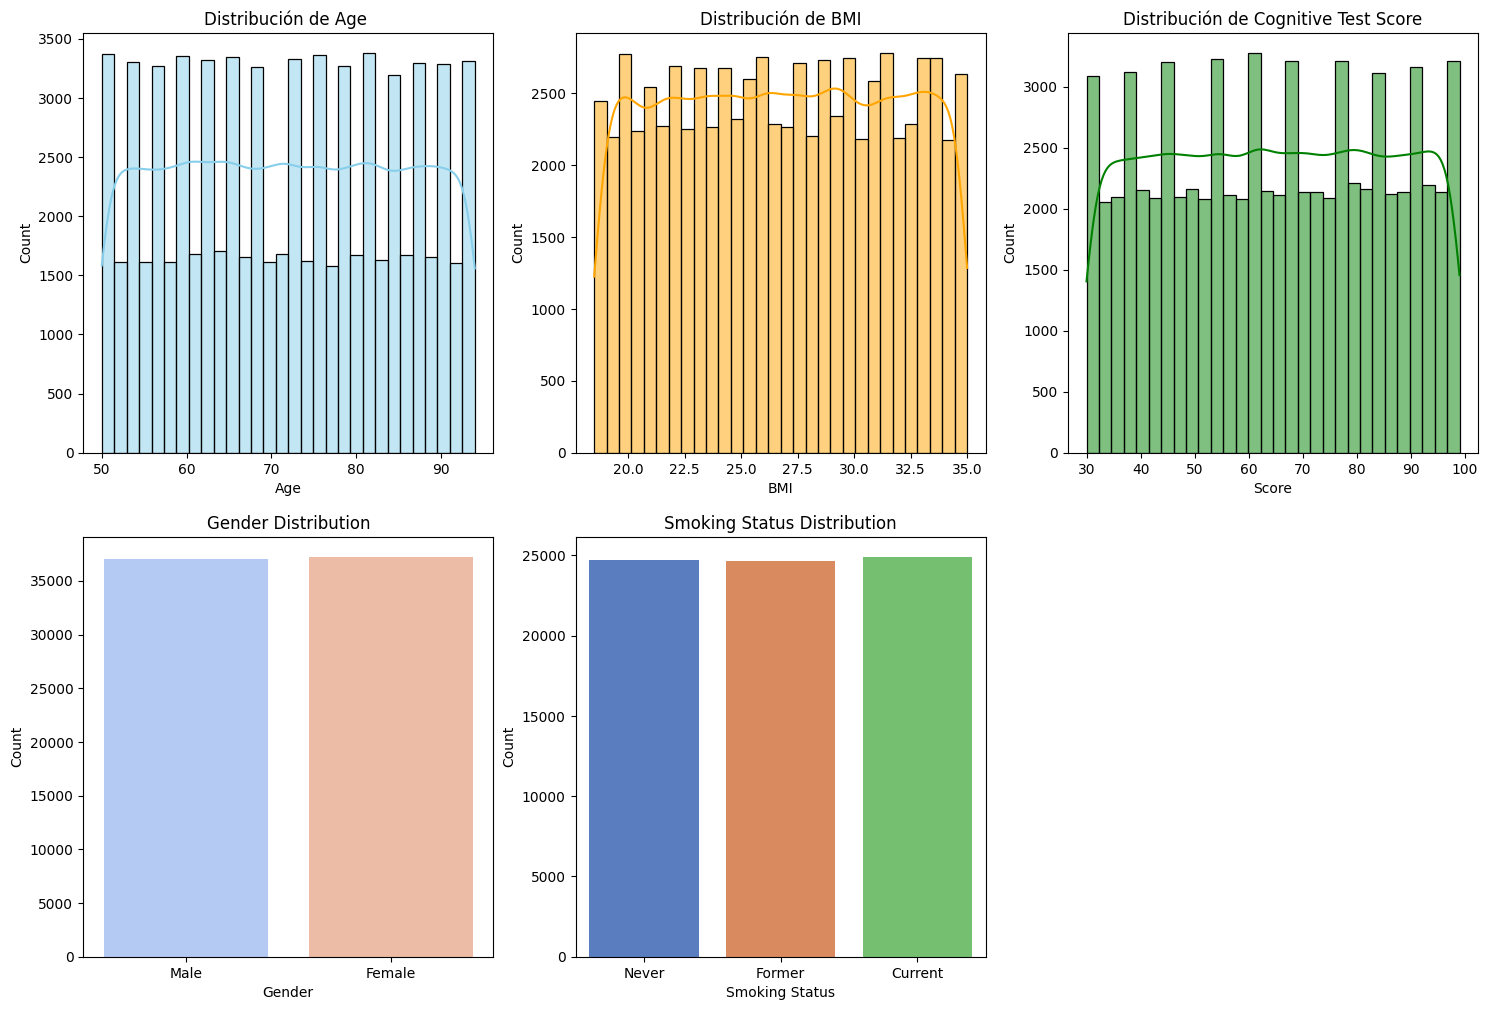

In [224]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Age ')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.histplot(df['BMI'], bins=30, kde=True, color='orange')
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
sns.histplot(df['Cognitive Test Score'], bins=30, kde=True, color='green')
plt.title('Distribución de Cognitive Test Score')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 3, 4)
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(2, 3, 5)
sns.countplot(x='Smoking Status', data=df, palette='muted')
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')



##Se puede observar que las variables están bien distribuidas, sin sesgos importantes ni outliers notables. No es necesario realizar transformaciones o tratamientos adicionales sobre estas variables en cuanto a su distribución.

<ipython-input-225-1e1d886bb56d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Alzheimer’s Diagnosis", data=df, palette='Set2')


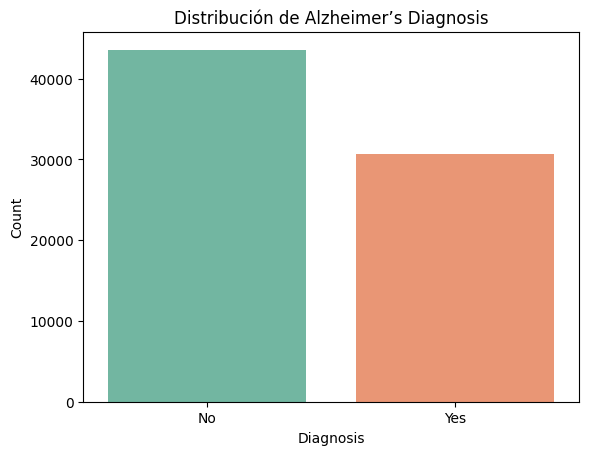

In [225]:
sns.countplot(x="Alzheimer’s Diagnosis", data=df, palette='Set2')
plt.title("Distribución de Alzheimer’s Diagnosis")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [226]:
# Calcular el porcentaje de cada clase
porcentajes = df["Alzheimer’s Diagnosis"].value_counts(normalize=True) * 100

# Mostrar los resultados
print(porcentajes)


Alzheimer’s Diagnosis
No     58.654066
Yes    41.345934
Name: proportion, dtype: float64


##Se puede observar tanto en el grafico anterior como en el porcentaje calculado que la variable objetivo presenta una proporción de aproximadamente 58% de casos "No" y 42% de casos "Yes", lo que indica que los datos están moderadamente balanceados.

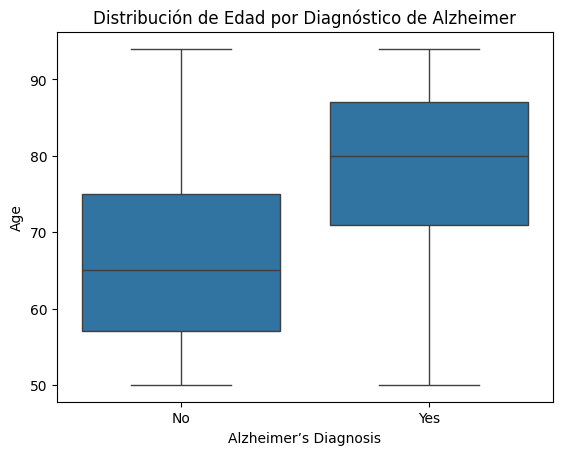

In [227]:
sns.boxplot(x="Alzheimer’s Diagnosis", y="Age", data=df)
plt.title("Distribución de Edad por Diagnóstico de Alzheimer")
plt.show()

##Las personas diagnosticadas con Alzheimer tienden a ser mayores. Esta visualización respalda la hipótesis de que a mayor edad, mayor es la probabilidad de diagnóstico de Alzheimer.

##Confirma que la edad es una variable importante a considerar en modelo.

In [228]:
#Mostrar valores unicos para luego determinar las variables nominales y ordinales

for column in df.columns:
    print(f"Columna: {column}")
    print(df[column].unique())
    print("_" * 40)

Columna: Country
['Spain' 'Argentina' 'South Africa' 'China' 'Sweden' 'South Korea'
 'Germany' 'UK' 'Canada' 'India' 'Italy' 'USA' 'Russia' 'Japan'
 'Australia' 'France' 'Norway' 'Saudi Arabia' 'Mexico' 'Brazil']
________________________________________
Columna: Age
[90 72 86 53 58 55 91 67 84 80 69 56 61 64 51 60 82 63 76 87 89 73 68 57
 77 62 59 50 88 78 52 74 70 75 65 81 94 79 93 92 83 85 71 66 54]
________________________________________
Columna: Gender
['Male' 'Female']
________________________________________
Columna: Education Level
[ 1  7 19 17  3  2 18 11 15 10  6 13 12  4 16  5 14  0  8  9]
________________________________________
Columna: BMI
[33.  29.9 22.9 31.2 30.  34.  24.1 23.6 22.  32.4 31.6 19.8 35.  32.1
 29.1 33.1 27.9 31.7 28.  30.9 19.3 25.  20.5 30.7 31.3 26.  34.1 25.6
 27.  25.8 27.2 27.5 19.7 30.2 27.8 26.1 19.5 33.2 30.4 25.4 30.8 33.8
 28.6 27.7 26.3 28.4 29.5 29.  33.6 23.5 31.4 19.9 20.1 18.8 19.  23.1
 34.7 31.9 29.3 22.6 21.3 23.3 26.5 23.9 31.5 32.6 24.

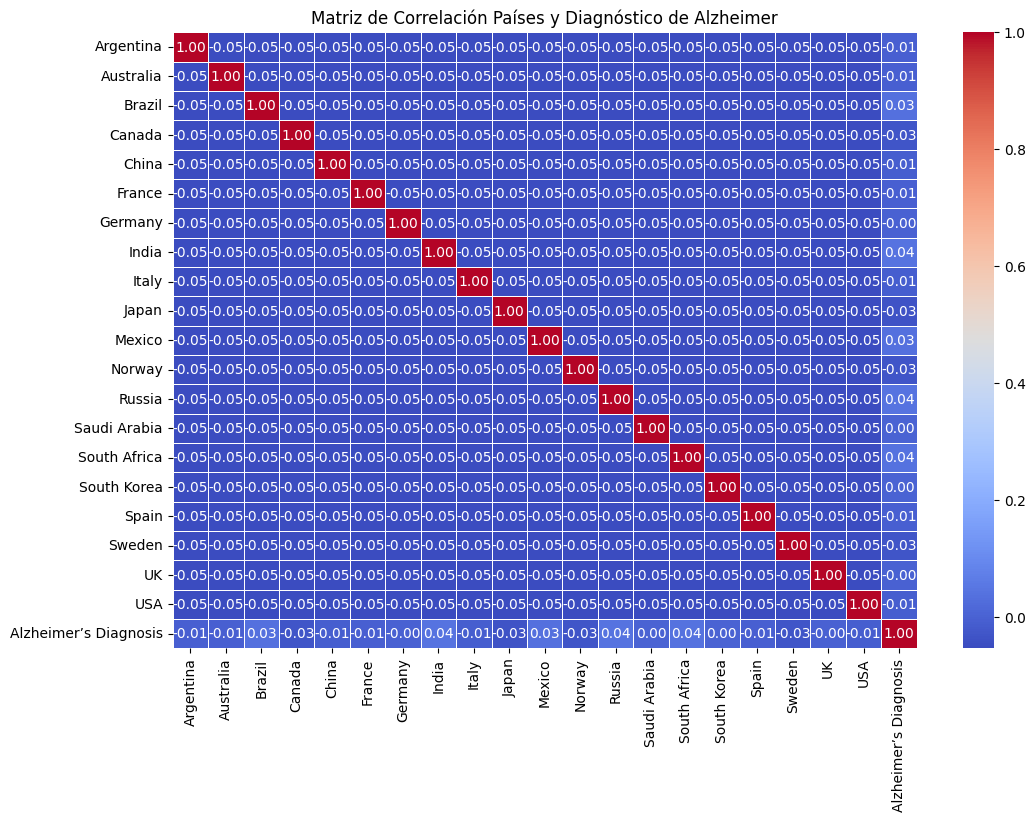

In [229]:
# Debido a que la variable Pais puede causar alta cardinalidad se analiza por separado

y = df["Alzheimer’s Diagnosis"].map({'No': 0, 'Yes': 1})

country_encoded = pd.get_dummies(df['Country'])

corr_data = pd.concat([country_encoded, y], axis=1)

corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación Países y Diagnóstico de Alzheimer")
plt.show()



## Dado que la variable Country al aplicar la codificación, presenta una baja correlación con el diagnóstico de Alzheimer , se puede concluir que no aporta información significativa al modelo predictivo. Por lo tanto, se decide eliminarla para simplificar el modelo y evitar incluir variables irrelevantes.

In [230]:

X = df.drop(["Alzheimer’s Diagnosis", "Country"], axis=1).copy() # se elimina la variable country y la variable a predecir
y = df["Alzheimer’s Diagnosis"].copy()

y = y.map({'No': 0, 'Yes': 1})

X.head()

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living
0,90,Male,1,33.0,Medium,Never,Occasionally,No,No,Normal,...,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban
1,72,Male,7,29.9,Medium,Former,Never,No,No,Normal,...,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban
2,86,Female,19,22.9,High,Current,Occasionally,No,Yes,Normal,...,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural
3,53,Male,17,31.2,Low,Never,Regularly,Yes,No,Normal,...,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural
4,58,Female,3,30.0,High,Former,Never,Yes,No,Normal,...,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural


In [231]:
# Variables nominales
nominal_cols = ['Gender', 'Smoking Status', 'Alcohol Consumption',
                 'Diabetes', 'Hypertension', 'Cholesterol Level',
                 'Family History of Alzheimer’s', 'Employment Status',
                 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
                 'Urban vs Rural Living']

# Variables ordinales

#'Depression Level', 'Sleep Quality', 'Dietary Habits',
# 'Air Pollution Exposure', 'Social Engagement Level',
# 'Income Level', 'Stress Levels','Physical Activity Level'

ordinal_mappings = {
    'Depression Level': ['Low', 'Medium', 'High'],
    'Sleep Quality': ['Poor', 'Average', 'Good'],
    'Dietary Habits': ['Unhealthy', 'Average', 'Healthy'],
    'Air Pollution Exposure': ['Low', 'Medium', 'High'],
    'Social Engagement Level': ['Low', 'Medium', 'High'],
    'Income Level': ['Low', 'Medium', 'High'],
    'Stress Levels': ['Low', 'Medium', 'High'],
    'Physical Activity Level': ['Low', 'Medium', 'High']
}

# One-Hot Encoding para variables nominales
X_encoded = pd.get_dummies(X, columns=nominal_cols, drop_first=True)

# Label Encoding para variables ordinales
for col, order in ordinal_mappings.items():
    if col in X_encoded.columns:
        mapping = {k: v for v, k in enumerate(order)}
        X_encoded[col] = X_encoded[col].map(mapping)


In [232]:
 X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       74283 non-null  int64  
 1   Education Level                           74283 non-null  int64  
 2   BMI                                       74283 non-null  float64
 3   Physical Activity Level                   74283 non-null  int64  
 4   Cognitive Test Score                      74283 non-null  int64  
 5   Depression Level                          74283 non-null  int64  
 6   Sleep Quality                             74283 non-null  int64  
 7   Dietary Habits                            74283 non-null  int64  
 8   Air Pollution Exposure                    74283 non-null  int64  
 9   Social Engagement Level                   74283 non-null  int64  
 10  Income Level                      

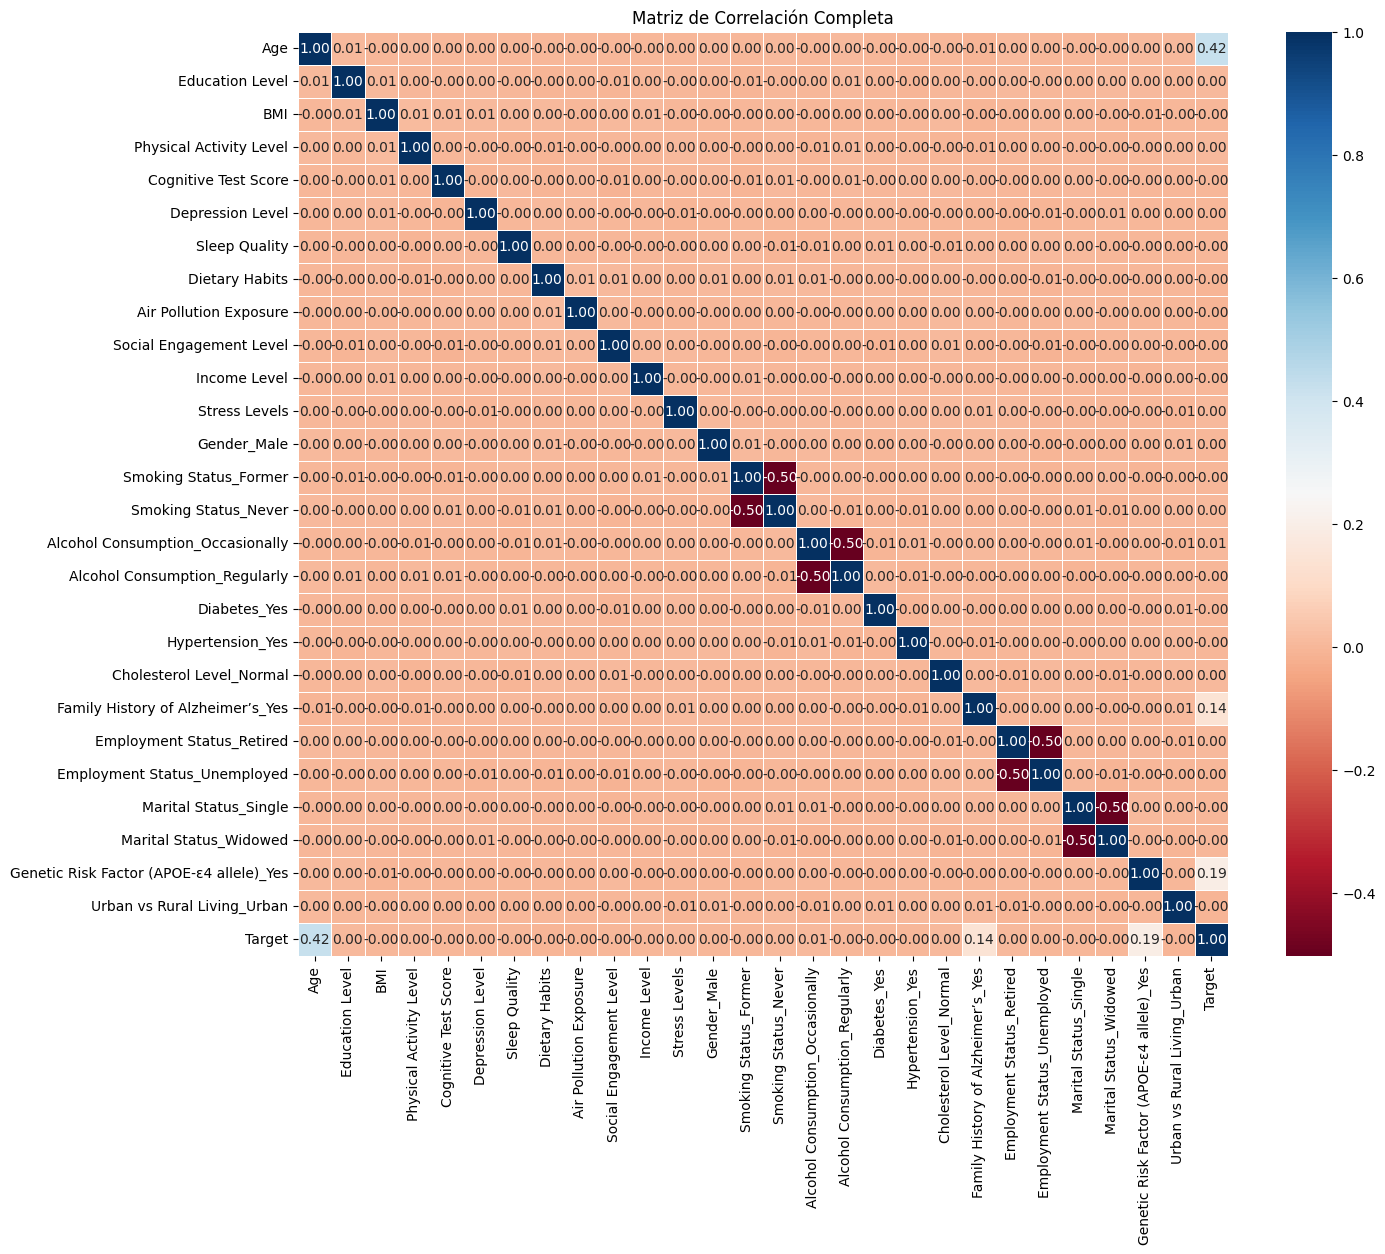

In [233]:
# agregar la variable objetivo para calcular la correlación respecto a ella
X_encoded['Target'] = y

# calcular correlaciones
correlation_matrix = X_encoded.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu',linewidths=0.5)
plt.title("Matriz de Correlación Completa")
plt.show()


In [234]:

# Ver correlación de las variables respecto a la variable objetivo ordenadas
corr_with_target = correlation_matrix['Target'].drop('Target').sort_values(key=abs, ascending=False)
print(" Variables más correlacionadas con la variable objetivo:\n")
print(corr_with_target)


 Variables más correlacionadas con la variable objetivo:

Age                                         0.419923
Genetic Risk Factor (APOE-ε4 allele)_Yes    0.194484
Family History of Alzheimer’s_Yes           0.140885
Alcohol Consumption_Occasionally            0.005561
Employment Status_Retired                   0.004721
Stress Levels                               0.004393
Dietary Habits                             -0.004364
Urban vs Rural Living_Urban                -0.004104
Air Pollution Exposure                     -0.003995
Smoking Status_Never                        0.003829
Education Level                             0.003732
Social Engagement Level                    -0.003003
Diabetes_Yes                               -0.002673
Physical Activity Level                     0.002310
Cholesterol Level_Normal                    0.002104
BMI                                        -0.001703
Gender_Male                                 0.001364
Smoking Status_Former                    

##Analizando la matriz de correlación, se observa que la variable objetivo Target("Alzheimer’s Diagnosis") presenta mayor asociación con las variables "Age", "Genetic Risk Factor (APOE-ε4 allele)" y "Family History of Alzheimer’s". Estas variables muestran las correlaciones más altas en relación con el diagnóstico, por lo que se consideran relevantes para el modelo predictivo.

In [235]:
X = df[['Age',
        'Family History of Alzheimer’s',
        'Genetic Risk Factor (APOE-ε4 allele)']].copy()

X.head()


,Age,Family History of Alzheimer’s,Genetic Risk Factor (APOE-ε4 allele)
0,90,No,No
1,72,No,No
2,86,No,No
3,53,No,No
4,58,No,No


In [236]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y) # se toma el 20% para prueba y 80% para entrenamiento


In [237]:
from sklearn.preprocessing import OneHotEncoder

# consulta profe: deberia unicamente trabajar con?

# Age                                         0.419923
# Genetic Risk Factor (APOE-ε4 allele)_Yes    0.194484
# Family History of Alzheimer’s_Yes           0.140885

#estas se podria considerar?

# Alcohol Consumption_Occasionally            0.005561
# Employment Status_Retired                   0.004721
# Stress Levels                               0.004393

col_nominales= [ 'Family History of Alzheimer’s','Genetic Risk Factor (APOE-ε4 allele)']


ohe = OneHotEncoder(sparse_output=False).fit(X_train[col_nominales])

# Transformar entrenamiento
encoded_train = ohe.transform(X_train[col_nominales])
encoded_df_train = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out(col_nominales), index=X_train.index)

# Transformar prueba
encoded_test = ohe.transform(X_test[col_nominales])
encoded_df_test = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out(col_nominales), index=X_test.index)

# Concatenar y eliminar las originales
X_train = pd.concat([X_train.drop(columns=col_nominales), encoded_df_train], axis=1)
X_test = pd.concat([X_test.drop(columns=col_nominales), encoded_df_test], axis=1)

In [238]:
X_train.head()

,Age,Family History of Alzheimer’s_No,Family History of Alzheimer’s_Yes,Genetic Risk Factor (APOE-ε4 allele)_No,Genetic Risk Factor (APOE-ε4 allele)_Yes
37761,66,1.0,0.0,1.0,0.0
42960,91,1.0,0.0,0.0,1.0
34335,70,1.0,0.0,1.0,0.0
45926,70,0.0,1.0,1.0,0.0
34537,67,0.0,1.0,1.0,0.0


In [239]:
X_test.head()

,Age,Family History of Alzheimer’s_No,Family History of Alzheimer’s_Yes,Genetic Risk Factor (APOE-ε4 allele)_No,Genetic Risk Factor (APOE-ε4 allele)_Yes
18353,90,1.0,0.0,1.0,0.0
7187,90,1.0,0.0,0.0,1.0
47364,66,1.0,0.0,1.0,0.0
53405,75,1.0,0.0,1.0,0.0
58417,94,0.0,1.0,1.0,0.0


In [240]:
X_test.head()

,Age,Family History of Alzheimer’s_No,Family History of Alzheimer’s_Yes,Genetic Risk Factor (APOE-ε4 allele)_No,Genetic Risk Factor (APOE-ε4 allele)_Yes
18353,90,1.0,0.0,1.0,0.0
7187,90,1.0,0.0,0.0,1.0
47364,66,1.0,0.0,1.0,0.0
53405,75,1.0,0.0,1.0,0.0
58417,94,0.0,1.0,1.0,0.0


In [241]:
X_train.head()

,Age,Family History of Alzheimer’s_No,Family History of Alzheimer’s_Yes,Genetic Risk Factor (APOE-ε4 allele)_No,Genetic Risk Factor (APOE-ε4 allele)_Yes
37761,66,1.0,0.0,1.0,0.0
42960,91,1.0,0.0,0.0,1.0
34335,70,1.0,0.0,1.0,0.0
45926,70,0.0,1.0,1.0,0.0
34537,67,0.0,1.0,1.0,0.0


In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
#Entrenamiento del modelo
clf = DecisionTreeClassifier(max_depth=10, random_state=42).fit(X_train, y_train)

In [244]:
#Prediccion sobre los datos de entrenamiento
train_pred = clf.predict(X_train)

#prediccion sobre los datos de prueba
test_pred = clf.predict(X_test)

In [245]:
print(train_pred[1000:1020])
print(test_pred[1000:1020])

[1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1]
[1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]


In [246]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Metricas de evaluacion
print("Rendimiento en Conjunto de Entrenamiento\n")
print(classification_report(y_train, train_pred))
print("-------------------------------------------------------")
print("Rendimiento en Conjunto de Pruebas\n")
print(classification_report(y_test, test_pred))


Rendimiento en Conjunto de Entrenamiento

              precision    recall  f1-score   support

           0       0.79      0.72      0.76     34856
           1       0.65      0.73      0.69     24570

    accuracy                           0.73     59426
   macro avg       0.72      0.73      0.72     59426
weighted avg       0.73      0.73      0.73     59426

-------------------------------------------------------
Rendimiento en Conjunto de Pruebas

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      8714
           1       0.65      0.74      0.69      6143

    accuracy                           0.73     14857
   macro avg       0.72      0.73      0.73     14857
weighted avg       0.74      0.73      0.73     14857



#Conclusión Final



##Se logró desarrollar un modelo de clasificación binaria utilizando Árboles de Decisión para predecir la probabilidad de diagnóstico de Alzheimer en pacientes, a partir de variables demográficas, médicas, de estilo de vida y antecedentes familiares.

##Utilizando un 80% de los registros para entrenamiento y un 20% para prueba, se observa que el modelo alcanza una exactitud, predicciones correctas tanto para casos positivos como negativos, del 73% tanto en el conjunto de entrenamiento como en el de prueba, lo que indica que el modelo generaliza de forma adecuada y no presenta overfitting ni underfitting.

##Además, se identificó que la edad, la presencia del factor genético APOE-ε4 y los antecedentes familiares de Alzheimer son los principales factores de riesgo asociados al diagnóstico.

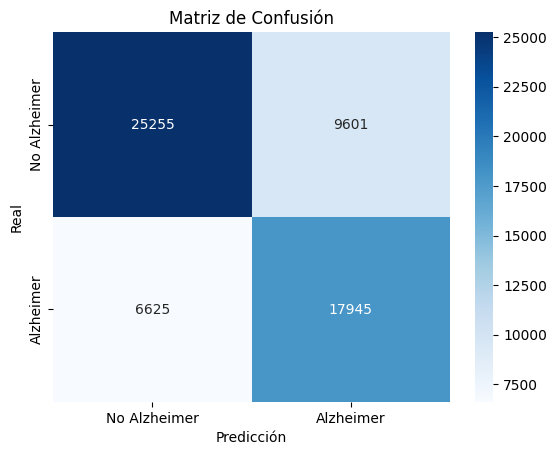

In [248]:
# EXTRA

# Matriz de Confusión
cm = confusion_matrix(y_train, train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['No Alzheimer', 'Alzheimer'],
             yticklabels=['No Alzheimer', 'Alzheimer'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


##Se observa que el modelo realiza buenas predicciones, aunque comete más errores al clasificar pacientes sin Alzheimer que con Alzheimer.